In [2]:
import numpy as np
import pandas as pd
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# !dir

In [3]:
df = pd.read_csv("drugs_side_effects_drugs_com.csv")
df.head()

drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne agents, Vaginal anti-infectives   

                                         brand_names activity rx_otc  \
0  Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                Aldactone, CaroSpir      82%     Rx   
2  Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                NaN      41%     Rx   
4  Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   

  pregnancy_category csa alcohol  \
0                  D   N       X   
1                  C   N       X   
2                  D   N     NaN   
3                  X   N       X   
4                  B   N     NaN   

                                       related_drugs  \
0  amoxicillin: https://www.drugs.com/amoxicillin...   
1  amlodipine: https://www.drugs.com/amlodipine.h...   
2  amoxicillin: https://www.drugs.com/amoxicillin...   
3  doxycycline: https://www.drugs.com/doxycycline...   
4  doxycycline: https://www.drugs.com/doxycycline...   

                       medical_condition_description  rating  no_of_reviews  \
0  Acne Other names: Acne Vulgaris; Blackheads; B...     6.8          760.0   
1  Acne Other names: Acne Vulgaris; Blackheads; B...     7.2          449.0   
2  Acne Other names: Acne Vulgaris; Blackheads; B...     5.7          482.0   
3  Acne Other names: Acne Vulgaris; Blackheads; B...     7.9          623.0   
4  Acne Other names: Acne Vulgaris; Blackheads; B...     7.4          146.0   

                                           drug_link  \
0             https://www.drugs.com/doxycycline.html   
1          https://www.drugs.com/spironolactone.html   
2             https://www.drugs.com/minocycline.html   
3                https://www.drugs.com/accutane.html   
4  https://www.drugs.com/mtm/clindamycin-topical....   

                       medical_condition_url  
0  https://www.drugs.com/condition/acne.html  
1  https://www.drugs.com/condition/acne.html  
2  https://www.drugs.com/condition/acne.html  
3  https://www.drugs.com/condition/acne.html  
4  https://www.drugs.com/condition/acne.html

In [4]:
df.isnull().sum()

# df.
df['drug_name'] = df['drug_name'].fillna('unknown')

In [5]:
df.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [6]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [7]:
df.head()
# Numeric : Activity, rating, no _of_reviews
# categorical : medical Condition ,pregnancy_category, csa, alcohol, related_drugs,
# mixed : Side_effects, drug_classes,brand_names

drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne agents, Vaginal anti-infectives   

                                         brand_names activity rx_otc  \
0  Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                Aldactone, CaroSpir      82%     Rx   
2  Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                NaN      41%     Rx   
4  Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   

  pregnancy_category csa alcohol  \
0                  D   N       X   
1                  C   N       X   
2                  D   N     NaN   
3                  X   N       X   
4                  B   N     NaN   

                                       related_drugs  \
0  amoxicillin: https://www.drugs.com/amoxicillin...   
1  amlodipine: https://www.drugs.com/amlodipine.h...   
2  amoxicillin: https://www.drugs.com/amoxicillin...   
3  doxycycline: https://www.drugs.com/doxycycline...   
4  doxycycline: https://www.drugs.com/doxycycline...   

                       medical_condition_description  rating  no_of_reviews  \
0  Acne Other names: Acne Vulgaris; Blackheads; B...     6.8          760.0   
1  Acne Other names: Acne Vulgaris; Blackheads; B...     7.2          449.0   
2  Acne Other names: Acne Vulgaris; Blackheads; B...     5.7          482.0   
3  Acne Other names: Acne Vulgaris; Blackheads; B...     7.9          623.0   
4  Acne Other names: Acne Vulgaris; Blackheads; B...     7.4          146.0   

                                           drug_link  \
0             https://www.drugs.com/doxycycline.html   
1          https://www.drugs.com/spironolactone.html   
2             https://www.drugs.com/minocycline.html   
3                https://www.drugs.com/accutane.html   
4  https://www.drugs.com/mtm/clindamycin-topical....   

                       medical_condition_url  
0  https://www.drugs.com/condition/acne.html  
1  https://www.drugs.com/condition/acne.html  
2  https://www.drugs.com/condition/acne.html  
3  https://www.drugs.com/condition/acne.html  
4  https://www.drugs.com/condition/acne.html

In [8]:
# performing feature engerning on side effects

In [9]:
df['side_effects'].value_counts()

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [10]:
# diff_breath = df[i for i in range(len(df['side_effects'])) if 'difficult breathing' in df['side_effects'][i]]
diff_breath_df = df[df['side_effects'].str.contains('difficult breathing', na=False)]
# df['side_effects'][2]
diff_breath_df            
# len(df['side_effects'])

drug_name medical_condition  \
0                      doxycycline              Acne   
4                      clindamycin              Acne   
6                        tretinoin              Acne   
9                          Retin-A              Acne   
10                          Aczone              Acne   
...                            ...               ...   
2920        bupropion / naltrexone       Weight Loss   
2923  chorionic gonadotropin (hcg)       Weight Loss   
2924                       Lomaira       Weight Loss   
2927                  fenfluramine       Weight Loss   
2930                 setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
4     hives ; difficult breathing; swelling of your ...   
6     hives ; difficult breathing; swelling of your ...   
9     hives; difficult breathing; swelling of your f...   
10    hives; difficult breathing; swelling of your f...   
...                                                 ...   
2920  fever, swollen glands, mouth sores, muscle or ...   
2923  hives ; difficult breathing; swelling of your ...   
2924  hives ; difficult breathing; swelling of your ...   
2927  hives ; difficult breathing; swelling of your ...   
2930  hives ; difficult breathing; swelling of your ...   

                                         generic_name  \
0                                         doxycycline   
4                                 clindamycin topical   
6                                   tretinoin topical   
9                                             Retin-A   
10                                    dapsone topical   
...                                               ...   
2920                         bupropion and naltrexone   
2923  human chorionic gonadotropin (HCG) (injectable)   
2924                                      phentermine   
2927                                     fenfluramine   
2930                                    setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
4          Topical acne agents, Vaginal anti-infectives   
6                                   Topical acne agents   
9                                   Topical acne agents   
10                                  Topical acne agents   
...                                                 ...   
2920                                        Anorexiants   
2923                                      Gonadotropins   
2924                                        Anorexiants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
6     Altreno, Atralin, Avita, Refissa, Renova, Reti...      30%     Rx   
9                                                   NaN      17%     Rx   
10                                                  NaN      13%     Rx   
...                                                 ...      ...    ...   
2920                                           Contrave       4%     Rx   
2923  Novarel, Ovidrel, Pregnyl, Profasi, Chorex, Go...       3%     Rx   
2924                                 Adipex-P, Suprenza       3%     Rx   
2927                                           Fintepla       1%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category csa alcohol  \
0                     D   N       X   
4                     B   N     NaN   
6                     C   N     NaN   
9                     C   N     NaN   
10                    C   N     NaN   
...                 ...  ..     ...   
2920                  X   N       X   
2923                  X   N     NaN 

In [11]:
# univariate analysis on numeric and categorical variable
# Numeric : Activity, rating, no _f_reviews
# categorical : medical Condition ,pregnancy_category, csa, alcohol, related_drugs,

In [25]:
df['activity'].dtype

dtype('int64')

In [22]:
# df['activity'] = df['activity'].str.rstrip('%').astype('float')
df['activity'] = df['activity'].astype('int')

In [23]:
df['activity'].dtype

dtype('int64')

In [26]:
df['activity'].describe()

count    2931.000000
mean        8.450358
std        16.933291
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max       100.000000
Name: activity, dtype: float64

<Axes: ylabel='Density'>

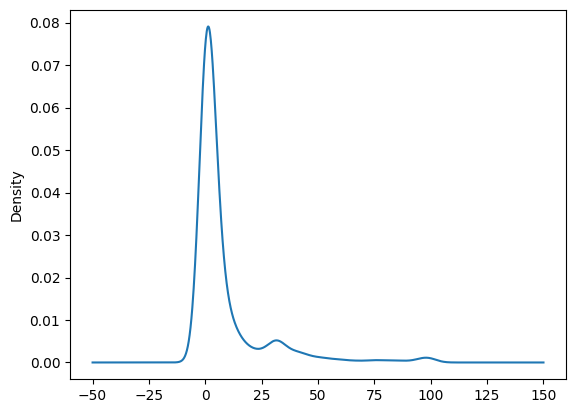

In [27]:
df['activity'].plot(kind='kde')

<Axes: ylabel='Frequency'>

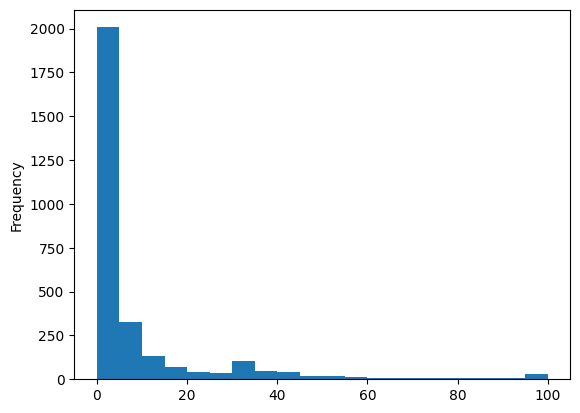

In [28]:
df['activity'].plot(kind="hist", bins=20)

<Axes: >

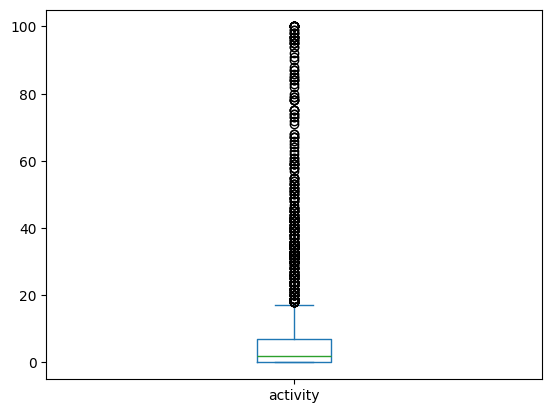

In [29]:
df['activity'].plot(kind='box')

In [45]:
df[df['activity']>95]

drug_name     medical_condition  \
238                                     Vyvanse                  ADHD   
293                                     Truvada              AIDS/HIV   
416                                     Aricept           Alzheimer's   
604                                    Lamictal      Bipolar Disorder   
722                                 carboplatin                Cancer   
742                                atorvastatin           Cholesterol   
787                                    Benadryl           Colds & Flu   
1032                                   docusate          Constipation   
1115                                 ivermectin              Covid 19   
1200                                    Humalog     Diabetes (Type 1)   
1257                                  metformin     Diabetes (Type 2)   
1361                                 loperamide              Diarrhea   
1399                              triamcinolone                Eczema   
1521                                     Cialis  Erectile Dysfunction   
1541                                 omeprazole      GERD (Heartburn)   
1618                                allopurinol                  Gout   
1638                                     Zyrtec              Hayfever   
1762                                  acyclovir                Herpes   
1772                                 lisinopril          Hypertension   
1949                              levothyroxine        Hypothyroidism   
1966                                 budesonide           IBD (Bowel)   
1988                                 oxybutynin          Incontinence   
2067  esterified estrogens / methyltestosterone             Menopause   
2074                                sumatriptan              Migraine   
2264                                alendronate          Osteoporosis   
2802                                     Keppra              Seizures   
2857                                    Tamiflu             Swine Flu   

                                           side_effects  \
238   hives; difficult breathing; swelling of your f...   
293   hives ; difficult breathing; swelling of your ...   
416   hives; difficult breathing; swelling of your f...   
604   mood or behavior changes, depression, anxiety ...   
722   Carboplatin may cause unwanted effects, partic...   
742   hives; difficulty breathing; swelling of your ...   
787   hives; difficult breathing; swelling of your f...   
1032  hives ; difficult breathing; swelling of your ...   
1115  hives ; difficult breathing; swelling of your ...   
1200  redness or swelling where an injection was giv...   
1257  hives ; difficult breathing; swelling of your ...   
1361  diarrhea that is watery or bloody; stomach pai...   
1399  hives ; difficult breathing; swelling of your ...   
1521  hives; difficulty breathing; swelling of your ...   
1541  hives ; difficulty breathing; swelling of your...   
1618  Stop using this medicine and get emergency med...   
1638  hives; difficult breathing; swelling of your f...   
1762  hives ; difficult breathing; swelling of your ...   
1772  hives; severe stomach pain, difficult breathin...   
1949  hives ; difficult breathing; swelling of your ...   
1966  hives ; difficulty breathing; swelling of your...   
1988  hives ; difficult breathing; swelling of your ...   
2067  heart attack symptoms--chest pain or pressure,...   
2074  hives ; difficulty breathing; swelling of your...   
2264  hives ; wheezing, difficulty breathing; swelli...   
2802  mood or behavior changes, depression, anxiety ...   
2857  sudden confusion; tremors or shaking; unusual ...   

                                         generic_name  \
238                                  lisdexamfetamine   
293   emtricitabine and tenofovir disoproxil fumarate   
416                                  donepezil (oral)   
604                                       lamotrigine   
722                carboplatin Brand name: Paraplatin  

In [75]:
df['activity'].describe()

count    2931.000000
mean        8.450358
std        16.933291
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max       100.000000
Name: activity, dtype: float64

In [76]:
df['activity'].skew()

np.float64(3.18801851706424)

In [ ]:
# Conclusion 


In [ ]:
# univariate analysis of rating

In [32]:
df['rating'].describe()

count    1586.000000
mean        6.812926
std         2.313044
min         0.000000
25%         5.600000
50%         7.000000
75%         8.500000
max        10.000000
Name: rating, dtype: float64

In [37]:
df['rating'].isnull().sum()

np.int64(1345)

In [38]:
df['rating'] = df['rating'].dropna()

In [39]:
df['rating'].describe()

count    1586.000000
mean        6.812926
std         2.313044
min         0.000000
25%         5.600000
50%         7.000000
75%         8.500000
max        10.000000
Name: rating, dtype: float64

<Axes: ylabel='Frequency'>

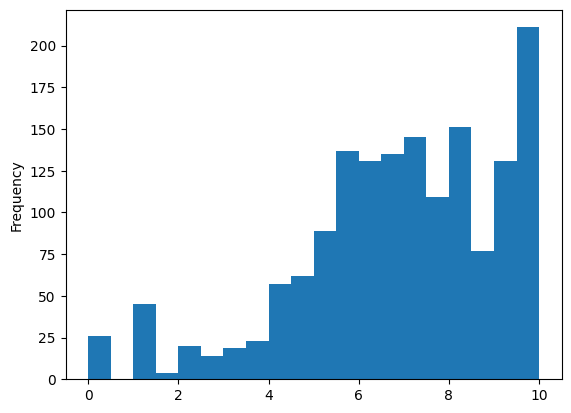

In [40]:
df['rating'].plot(kind='hist', bins=20 )

<Axes: ylabel='Density'>

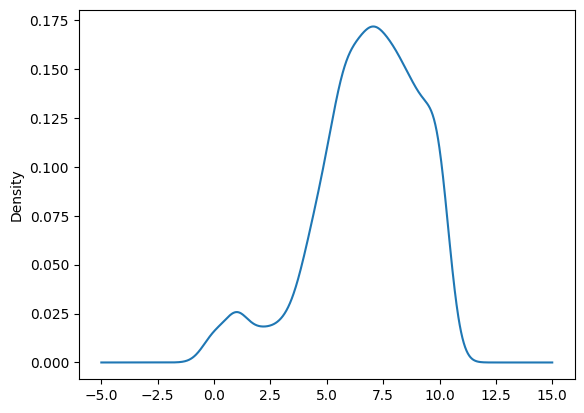

In [42]:
df['rating'].plot(kind='kde')

In [43]:
df['rating'].skew()

np.float64(-0.8169284977475764)

<Axes: >

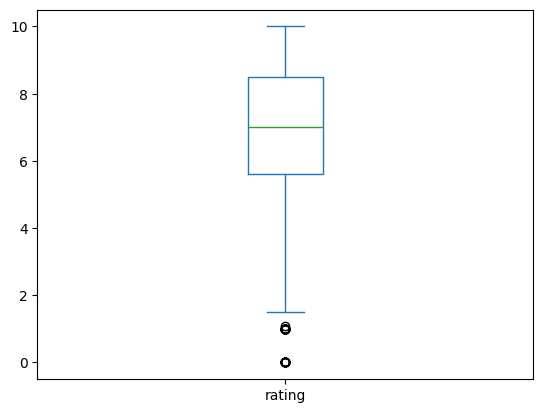

In [44]:
df['rating'].plot(kind='box')

In [47]:
df[df['rating']<1.25]

drug_name medical_condition  \
150          BPO Gel              Acne   
300           Norvir          AIDS/HIV   
314        ritonavir          AIDS/HIV   
323         abacavir          AIDS/HIV   
362         Pifeltro          AIDS/HIV   
...              ...               ...   
2742         Sorilux         Psoriasis   
2801  Invega Hafyera     Schizophrenia   
2808       midazolam          Seizures   
2809        Nayzilam          Seizures   
2873          Urelle               UTI   

                                           side_effects  \
150   Along with its needed effects, a medicine may ...   
300   irregular heartbeats, or a light-headed feelin...   
314   irregular heartbeats, or a light-headed feelin...   
323   Stop using abacavir and call your doctor at on...   
362   hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2742  hives; difficult breathing; swelling of your f...   
2801  Invega Hafyera may cause serious side effects,...   
2808  hives ; difficult breathing; swelling of your ...   
2809  hives ; difficult breathing; swelling of your ...   
2873  hives ; difficult breathing; swelling of your ...   

                                           generic_name  \
150                    benzoyl peroxide (topical route)   
300                                           ritonavir   
314                                           ritonavir   
323                                            abacavir   
362                                          doravirine   
...                                                 ...   
2742                              calcipotriene topical   
2801                             paliperidone palmitate   
2808                                   midazolam (oral)   
2809                                  midazolam (nasal)   
2873  hyoscyamine, methenamine, methylene blue, phen...   

                                           drug_classes  \
150                                 Topical acne agents   
300             Antiviral boosters, Protease inhibitors   
314             Antiviral boosters, Protease inhibitors   
323   Nucleoside reverse transcriptase inhibitors (N...   
362                                              NNRTIs   
...                                                 ...   
2742                             Topical antipsoriatics   
2801                            Atypical antipsychotics   
2808                                    Benzodiazepines   
2809                                    Benzodiazepines   
2873                             Urinary antispasmodics   

                                            brand_names  activity rx_otc  \
150                                                 NaN         0    OTC   
300                                                 NaN        50     Rx   
314                                              Norvir        17     Rx   
323                                              Ziagen        11     Rx   
362                                                 NaN         2     Rx   
...                                                 ...       ...    ...   
2742                                                NaN         0     Rx   
2801                                                NaN         0     Rx   
2808                                             Versed        32     Rx   
2809                                                NaN        32     Rx   
2873  Azuphen MB, Hyolev MB, Phosphasal, UR N-C, Ura...         1     Rx   

     pregnancy_category csa alcohol  \
150                   C   N     NaN   
300                   B   N     NaN   
314                   B   N     NaN   
323                   C   N       X   
362                 NaN   N     NaN   
...                 ...  ..     ...   
2742                  C   N     NaN   
2801                  C   N       X   
2808                  D   4       X   
2809                  D   4       X   
2873                  C   N       X  

In [ ]:
# Conclusion

In [48]:
df['no_of_reviews'].describe()

count    1586.000000
mean       75.064943
std       184.900847
min         1.000000
25%         2.000000
50%        12.000000
75%        58.000000
max      2934.000000
Name: no_of_reviews, dtype: float64

<Axes: ylabel='Frequency'>

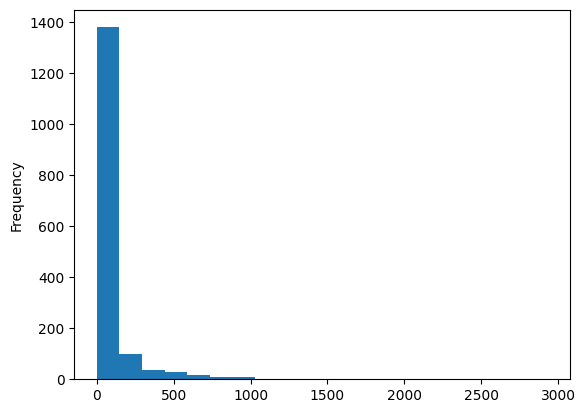

In [49]:
df['no_of_reviews'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

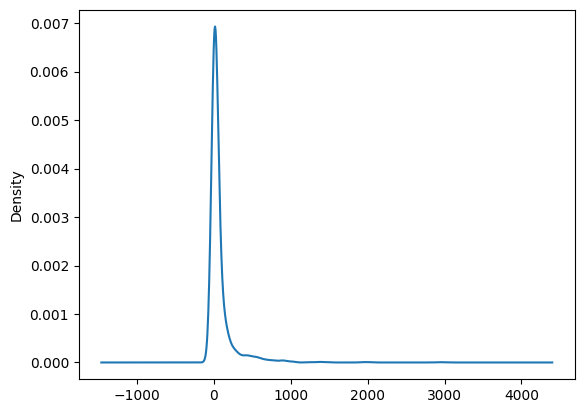

In [50]:
df['no_of_reviews'].plot(kind='kde')

<Axes: >

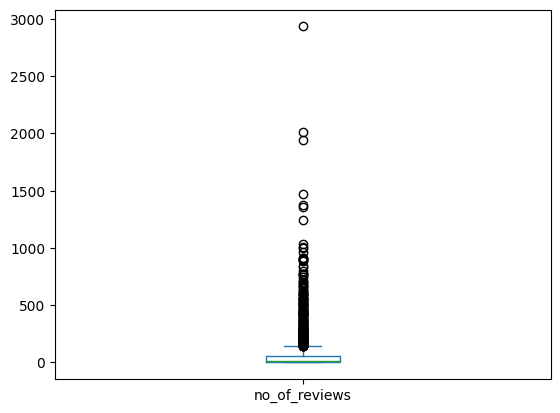

In [51]:
df['no_of_reviews'].plot(kind='box')

In [53]:
df[df['no_of_reviews'] > 1200]

drug_name medical_condition  \
523             escitalopram           Anxiety   
1036               bisacodyl      Constipation   
2862          nitrofurantoin               UTI   
2908             phentermine       Weight Loss   
2910                Contrave       Weight Loss   
2917                 Saxenda       Weight Loss   
2920  bupropion / naltrexone       Weight Loss   

                                           side_effects  \
523   skin rash or hives ; difficulty breathing; swe...   
1036  hives ; difficult breathing; swelling of your ...   
2862  hives; difficult breathing; swelling of your f...   
2908  hives ; difficult breathing; swelling of your ...   
2910  fever, swollen glands, mouth sores, muscle or ...   
2917  hives; fast heartbeats; dizziness; trouble bre...   
2920  fever, swollen glands, mouth sores, muscle or ...   

                     generic_name                             drug_classes  \
523                  escitalopram  Selective serotonin reuptake inhibitors   
1036  bisacodyl (oral and rectal)                                Laxatives   
2862               nitrofurantoin                  Urinary anti-infectives   
2908                  phentermine              Anorexiants, CNS stimulants   
2910     bupropion and naltrexone                              Anorexiants   
2917                  liraglutide                        Incretin mimetics   
2920     bupropion and naltrexone                              Anorexiants   

                                            brand_names  activity rx_otc  \
523                                             Lexapro        28     Rx   
1036  Correctol, Doxidan Tablet, Ducodyl, Dulcolax L...        32    OTC   
2862                              Macrobid, Macrodantin        84     Rx   
2908                        Adipex-P, Lomaira, Suprenza        95     Rx   
2910                                                NaN        23     Rx   
2917                                            Victoza        12     Rx   
2920                                           Contrave         4     Rx   

     pregnancy_category csa alcohol  \
523                   C   N       X   
1036                  B   N     NaN   
2862                  B   N     NaN   
2908                  X   4       X   
2910                  X   N       X   
2917                  C   N       X   
2920                  X   N       X   

                                          related_drugs  \
523                                                 NaN   
1036  erythromycin: https://www.drugs.com/erythromyc...   
2862                                                NaN   
2908                                                NaN   
2910                                                NaN   
2917                                                NaN   
2920                                                NaN   

                          medical_condition_description  rating  \
523   Anxiety Other names: Anxiety States; Nerves; N...     7.4   
1036  Constipation Other names: Difficulty passing s...     5.2   
2862  Urinary Tract Infection Other names: Acute Bac...     4.2   
2908  Weight Loss (Obesity/Overweight) More than hal...     8.7   
2910  Weight Loss (Obesity/Overweight) More than hal...     6.6   
2917  Weight Loss (Obesity/Overweight) More than hal...     7.5   
2920  Weight Loss (Obesity/Overweight) More than hal...     6.6   

      no_of_reviews                                          drug_link  \
523          1471.0            https://www.drugs.com/escitalopram.html   
1036         1357.0  https://www.drugs.com/mtm/bisacodyl-oral-and-r...   
2862         1242.0          https://www.drugs.com/nitrofurantoin.html   
2908         2934.0             https://www.drugs.com/phentermine.html   
2910         1939.0                https://www.drugs.com/contrave.html   
2917         1377.0                 https://www.drugs.com/saxenda.html   
2920         2013.0  https://www.drugs.com/mtm/bupropion-and-naltre...

In [ ]:
# conclusion

In [58]:
df['medical_condition'].value_counts()

medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
COPD                     23
Weight Loss              23
IBD (Bowel)              22
Cancer                   20
Sc

<Axes: ylabel='count'>

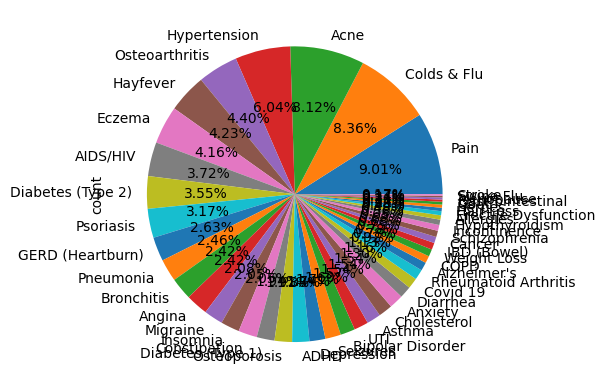

In [65]:
df['medical_condition'].value_counts().plot(kind='pie', autopct= '%1.2f%%')

<Axes: ylabel='Frequency'>

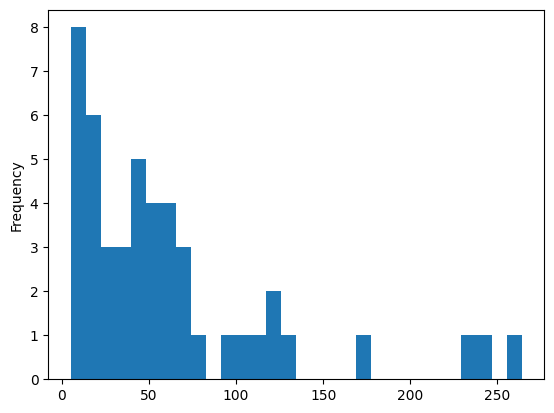

In [67]:
df['medical_condition'].value_counts().plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

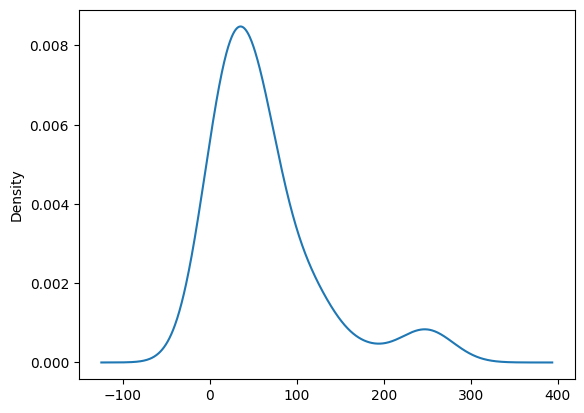

In [68]:
df['medical_condition'].value_counts().plot(kind='kde')

<Axes: >

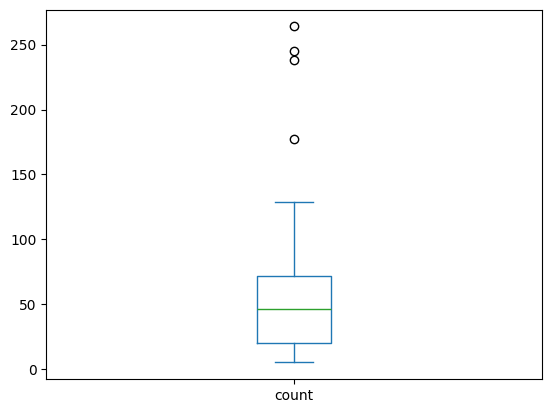

In [71]:
df['medical_condition'].value_counts().plot(kind='box')

In [87]:
# Conclusion 

In [89]:
df['rx_otc'].value_counts().describe()

count       3.000000
mean      976.666667
std       895.201281
min       328.000000
25%       466.000000
50%       604.000000
75%      1301.000000
max      1998.000000
Name: count, dtype: float64

<Axes: ylabel='count'>

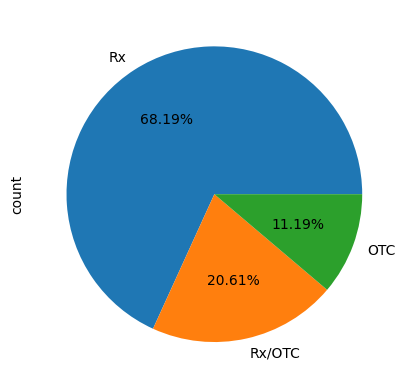

In [92]:
df['rx_otc'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: ylabel='Density'>

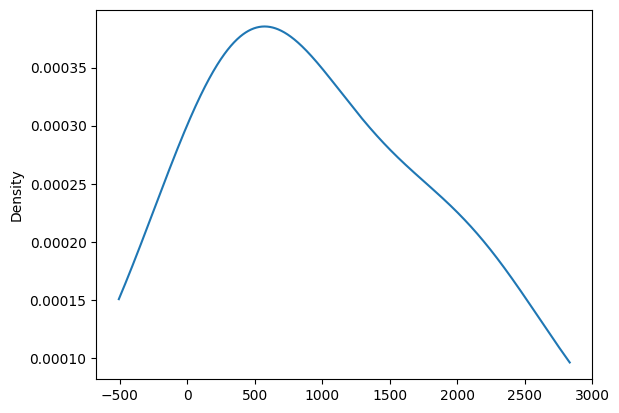

In [93]:
df['rx_otc'].value_counts().plot(kind='kde')

In [ ]:
# Conclusion

<Axes: ylabel='count'>

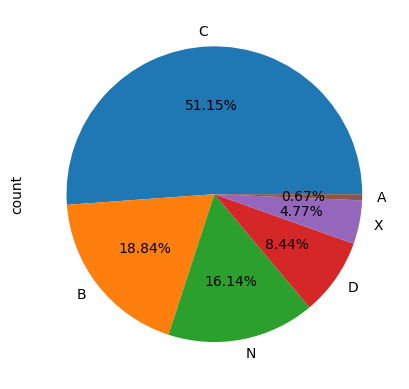

In [95]:
df['pregnancy_category'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: ylabel='Density'>

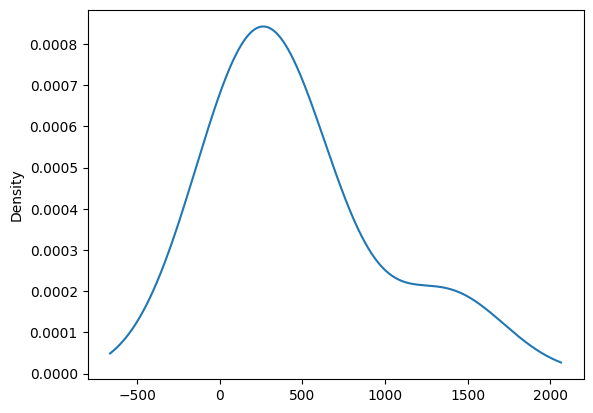

In [96]:
df['pregnancy_category'].value_counts().plot(kind='kde')

In [ ]:
# Conclusion